### Python e o PIP já vem instalado na máquina virtual provisionada. Exemplo: confira a versão do Python via Python.

In [1]:
import platform

In [2]:
print(platform.python_version())

3.10.12


In [3]:
print(platform.system())

Linux


In [6]:
# Conferir a versão do Python via Bash (linguagem nativa do Linux).
!python-V

/bin/bash: line 1: python-V: command not found


In [7]:
# Conferir a versão do PIP via Bash (linguagem nativa do Linux).
!pip-V

/bin/bash: line 1: pip-V: command not found


### **Google Colab**
### O software do Python já vem "aberto" para ser utilizado.



In [8]:
from datetime import datetime
print(datetime.now().year)

2024


### **Máquina local**
### 1. Crie uma pasta (sugestão);

### 2. Abrao terminal nesta pasta (Windows ou linux/macos right click

### 3. Execute o seguinte comando: Python shift + right click

### 4. Para 'sair' do Python, basta fechar o terminal ou digitar o seguinte código: quit()

### **Script para extrair a taxa CDI do site da B3.**

In [9]:
import os
import json
from random import random
from datetime import datetime

In [12]:
!sudo systemd-resolve --flush-caches

sudo: systemd-resolve: command not found


In [14]:
import requests

URL = 'https://www2.cetip.com.br/ConsultarTaxaDi/ConsultarTaxaDICetip.aspx'
from datetime import datetime
data_e_hora = datetime.now()
data = datetime.strftime(data_e_hora, '%Y/%m/%d')
hora = datetime.strftime(data_e_hora, '%H:%M:%S')


import socket

try:
    response = requests.get(URL, timeout=10, headers={'Host': 'www2.cetip.com.br'}, allow_redirects=True)
    response.raise_for_status()
except requests.exceptions.RequestException as exc:
    print(f"An error occurred: {exc}")
    cdi = None

except requests.HTTPError as exc:
    print("Dado não encontrado, continuando.")
    cdi = None
except Exception as exc:
    print("Erro, parando a execução.")
    raise exc
else:
    import json
    from random import random
    dado = json.loads(response.text)
    cdi = float(dado['taxa'].replace(',', '.')) + (random() - 0.5)

An error occurred: HTTPSConnectionPool(host='www2.cetip.com.br', port=443): Max retries exceeded with url: /ConsultarTaxaDi/ConsultarTaxaDICetip.aspx (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7ec7a4131c90>: Failed to resolve 'www2.cetip.com.br' ([Errno -5] No address associated with hostname)"))


In [16]:
# Verificando se o arquivo "taxa-cdi.csv" existe
if os.path.exists('./taxa-cdi.csv') == False:
    with open(file='./taxa-cdi.csv', mode='w', encoding='utf8') as fp:
        fp.write('data,hora,taxa\n')
# Salvando dados no arquivo "taxa-cdi.csv"
    with open(file='./taxa-cdi.csv', mode='a', encoding='utf8') as fp:
        fp.write(f'{data},{hora},{cdi}\n')
    print("Sucesso")

Sucesso


### **Vamos criar o arquivo de script extrair-cdi.py**

In [17]:
!python extrair-cdi.py

python3: can't open file '/content/extrair-cdi.py': [Errno 2] No such file or directory


### **Script com argumentos.**

In [18]:
from sys import argv

print(argv)
print(type(argv))

['/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py', '-f', '/root/.local/share/jupyter/runtime/kernel-14c53e53-7690-4312-8213-667ba8cb1808.json']
<class 'list'>


### **Vamos criar o arquivo de script args.py**

In [19]:
!python args.py andre True 10 20

python3: can't open file '/content/args.py': [Errno 2] No such file or directory


### **Script para gerar um grafico da taxa CDI do site da B3.**

In [20]:
import csv
from sys import argv
import seaborn as sns

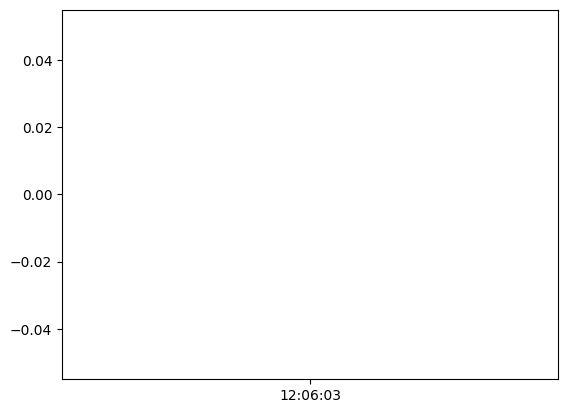

In [27]:
horas = []
taxas = []
with open(file='./taxa-cdi.csv', mode='r', encoding='utf8') as fp:
    linha = fp.readline()
    linha = fp.readline()
    while linha:
        linha_separada = linha.split(sep=',')
        hora = linha_separada[1]
        horas.append(hora)

        try:
            taxa_str = linha_separada[2].strip()
            taxa = float(taxa_str) if taxa_str not in ('None', '') else 0.0
        except ValueError:
            print(f"Skipping row with invalid taxa value: {linha_separada[2]}")
            linha = fp.readline()
            continue
        taxas.append(taxa)
        linha = fp.readline()

if horas and taxas:

    grafico = sns.lineplot(x=horas, y=taxas)
    grafico.get_figure().savefig(f"{argv[1]}.png")
else:
    print("Error: 'horas' or 'taxas' list is empty. Check the CSV data extraction.")

### **Vamos criar o arquivo de script cdi-grafico.py**

In [28]:
!python cdi-grafico.py dia-10

python3: can't open file '/content/cdi-grafico.py': [Errno 2] No such file or directory


### **Máquina local**
### **Mesma dinâmica!**

## **Instale o Python na máquina**

### **Bash:** Linguagem própria do Linux. Todos os códigos possuem um ponto de exclamação no início “!”

### **Scripting:** Sequência lógica de código que podemos executar repetidamente dentro e fora do Google Colab.

### **Platform:** Pacote próprio do Python que traz uma série de informações sobre a plataforma que estamos trabalhando, como a versão do Python, o sistema operacional que está rodando o Python, entre outras.

### **Terminal:** Linha de comando do Linux e do MacOs para abrir a linha de comandos. No windows se chama “cmd”



## **Execute códigos Python no terminal**

### **Quit():** Função nativa do Python para parar a execução do software do Python.

### **Shift + botão direito do mouse:** Atalho do Windows para abrir o terminal dentro de uma pasta.



## **Crie arquivos de script Python**

### **Argumentos:** São (valores) informações que são passadas para uma função que será chamada no script.

### **Path:** Módulo do pacote Os com uma função chamada “exist” que verifica se um arquivo existe.

### **IDEs:** Em inglês significa Integrated Development Environment, em português chamamos de Ferramenta de Desenvolvimento Integral, que são ferramentas específicas para desenvolvimento de softwares específicos para cada tipo de linguagem. Para o Python as mais famosas são a  PyCharm e a Visual Studio Code.

### **PEP:** Documento com as boas práticas de uso do Python feito pela própria comunidade. Uma das mais conhecidas é a PEP 8.

### **Sns:** É como a comunidade apelida o pacote seaborn.

### **Script:** Arquivo com a extensão .py com códigos Python dentro ordenados logicamente. O script consome módulos para automação, ou seja, executa tudo o que está dentro de um arquivo de uma única vez.

### **Os:** Pacote de interação da biblioteca nativa do Python.

